In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
df = pd.read_csv(r'D:\data science\data science assg\ass.16 Neural Network\forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.shape

(517, 31)

<AxesSubplot:>

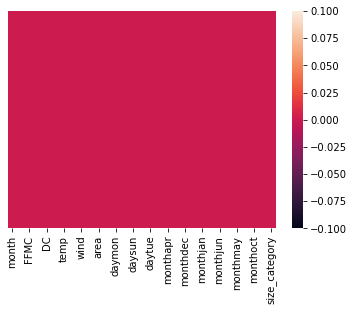

In [4]:
sns.heatmap(df.isnull(),yticklabels=False)

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
df['size_category']=le.fit_transform(df['size_category'])

In [7]:
df=pd.get_dummies(df)

C:\Users\91832\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size_category', ylabel='Density'>

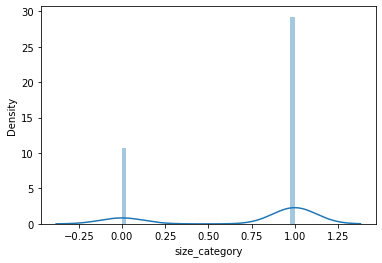

In [8]:
sns.distplot(df['size_category'],bins=40)

In [9]:
X = df.drop('size_category',axis=1)
y = df['size_category']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [12]:
model=Sequential()
model.add(Dense(150,activation='linear'))
model.add(Dense(100,activation='linear'))
model.add(Dense(50,activation='linear'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history=model.fit(X_train, y_train,epochs=100,batch_size=10)

Epoch 1/100
37/37 [==============================] - 3s 5ms/step - loss: 0.7734 - accuracy: 0.5981
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4961 - accuracy: 0.7717
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.8174
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.8044
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.8197
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3315 - accuracy: 0.8821
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3332 - accuracy: 0.8920
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.8695
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.8444
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.9018
Epoch 11/

Epoch 83/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9885
Epoch 84/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9832
Epoch 85/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 0.9869
Epoch 86/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9807
Epoch 87/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9793
Epoch 88/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9586
Epoch 89/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0902 - accuracy: 0.9775
Epoch 90/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9890
Epoch 91/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9902
Epoch 92/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9698


In [15]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 1s 4ms/step - loss: 0.1100 - accuracy: 0.9808
accuracy: 98.08%


In [16]:
model.history.history.keys()


dict_keys([])

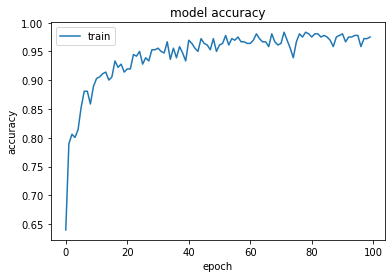

In [17]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

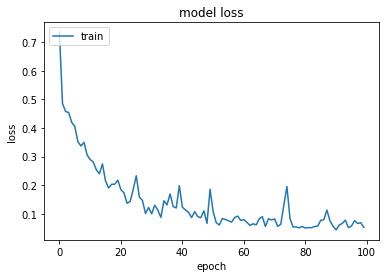

In [18]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [19]:
predictions = model.predict_classes(X_test)
predictions

C:\Users\91832\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.99      0.98      0.99       107

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156

